In [ ]:
# Importando as Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregando os Dados

file_name = 'Coffee Shop Sales.xlsx'
df = pd.read_excel(file_name)

In [ ]:
# Exploração Inicial dos Dados

print("--- Amostra dos Dados (5 primeiras linhas) ---")
print(df.head())

print("\n\n--- Informações Técnicas da Tabela ---")
df.info()

--- Amostra dos Dados (5 primeiras linhas) ---
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gour

In [ ]:
# Limpeza e Preparação

# Convertendo a coluna de data de texto para o formato de data

df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Criando a coluna 'faturamento' multiplicando a quantidade pelo preço unitário

df['faturamento'] = df['transaction_qty'] * df['unit_price']

In [ ]:
# Tradução das Colunas

# Criando as colunas com os nomes em inglês

df['mes'] = df['transaction_date'].dt.month_name()
df['dia_da_semana'] = df['transaction_date'].dt.day_name()

# Dicionários traduzidos

mapa_dias = {'Monday': 'Segunda-feira', 'Tuesday': 'Terça-feira', 'Wednesday': 'Quarta-feira', 'Thursday': 'Quinta-feira', 'Friday': 'Sexta-feira', 'Saturday': 'Sábado', 'Sunday': 'Domingo'}
mapa_meses = {'January': 'Janeiro', 'February': 'Fevereiro', 'March': 'Março', 'April': 'Abril', 'May': 'Maio', 'June': 'Junho'}
mapa_categorias = {'Coffee': 'Café', 'Tea': 'Chá', 'Bakery': 'Padaria', 'Drinking Chocolate': 'Chocolate Quente', 'Flavours': 'Xaropes', 'Coffee beans': 'Grãos de Café', 'Loose Tea': 'Chá a Granel', 'Packaged Chocolate': 'Chocolate Embalado', 'Branded': 'Produtos da Marca'}

# Aplicando a tradução

df['dia_da_semana'] = df['dia_da_semana'].map(mapa_dias)
df['mes'] = df['mes'].map(mapa_meses)
df['product_category'] = df['product_category'].map(mapa_categorias)

In [ ]:
# Verificação da Preparação

print("--- Verificação Pós-Tradução ---")
print("Dados após a limpeza, preparação e tradução:")
print(df.head())

--- Verificação Pós-Tradução ---
Dados após a limpeza, preparação e tradução:
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price  product_category  \
0         5  Lower Manhattan          32         3.0              Café   
1         5  Lower Manhattan          57         3.1               Chá   
2         5  Lower Manhattan          59         4.5  Chocolate Quente   
3         5  Lower Manhattan          22         2.0              Café   
4         5  Lower Manhattan          57         3.1               Chá   

            product_type               produ

/tmp/ipython-input-1297320138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_por_mes.index, y=faturamento_por_mes.values, palette='viridis')


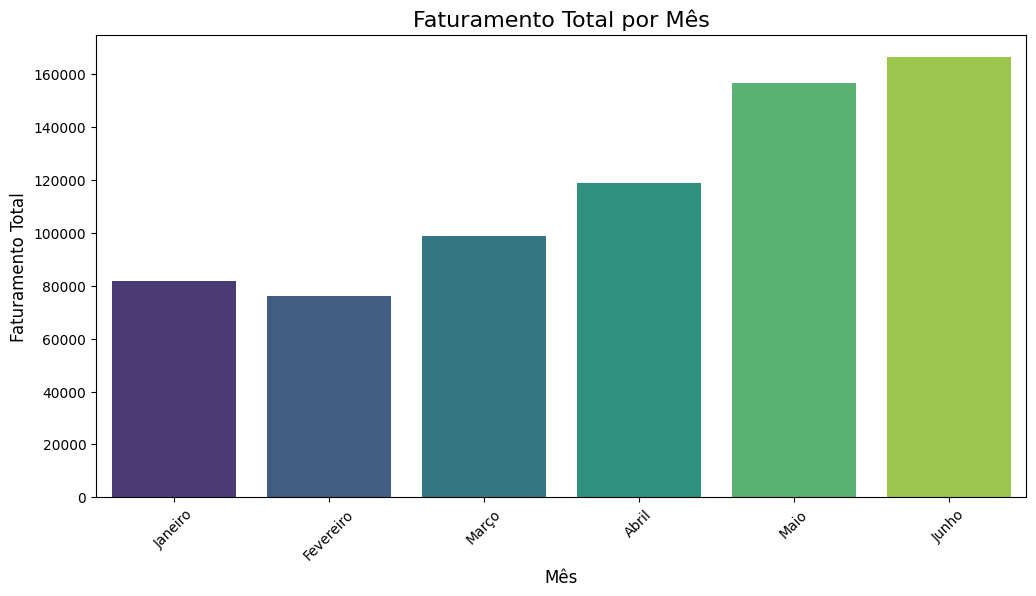

In [ ]:
# Gráfico 1 - Faturamento por Mês

# Ordenando os meses para o gráfico ficar na ordem correta

ordem_meses_pt = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
faturamento_por_mes = df.groupby('mes')['faturamento'].sum().reindex(ordem_meses_pt)

# Criando o gráfico

plt.figure(figsize=(12, 6))
sns.barplot(x=faturamento_por_mes.index, y=faturamento_por_mes.values, palette='viridis')
plt.title('Faturamento Total por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Faturamento Total', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('faturamento_por_mes_pt.png')
plt.show()

/tmp/ipython-input-3226156212.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produtos_mais_vendidos.index, y=produtos_mais_vendidos.values, palette='plasma')


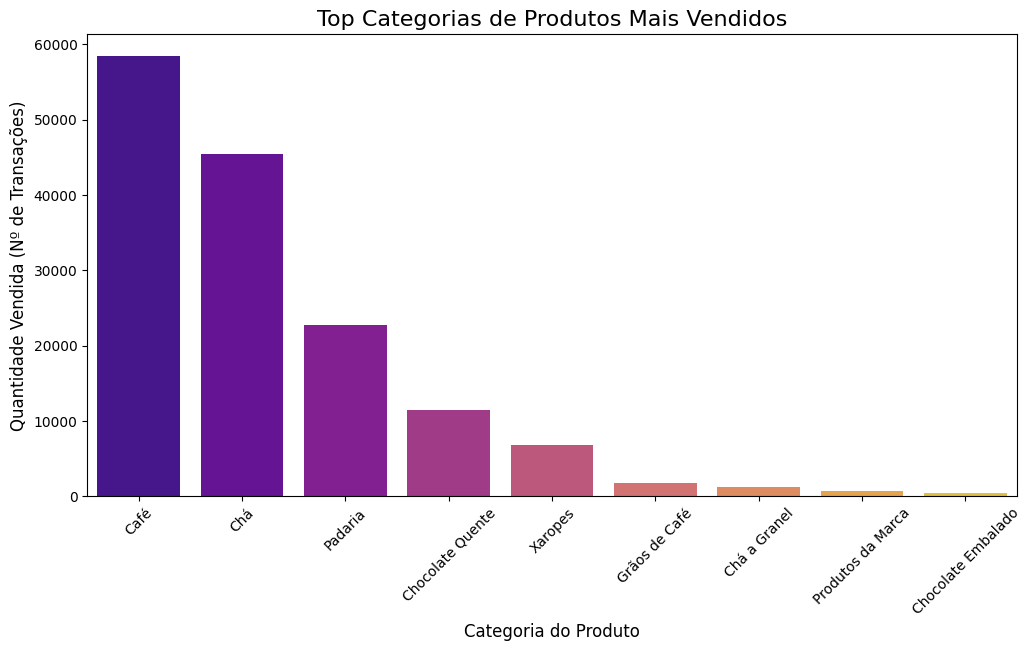

In [ ]:
# Gráfico 2 - Produtos Mais Vendidos

produtos_mais_vendidos = df['product_category'].value_counts()

# Criação do gráfico

plt.figure(figsize=(12, 6))
sns.barplot(x=produtos_mais_vendidos.index, y=produtos_mais_vendidos.values, palette='plasma')
plt.title('Top Categorias de Produtos Mais Vendidos', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Quantidade Vendida (Nº de Transações)', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('produtos_mais_vendidos_pt.png')
plt.show()

/tmp/ipython-input-2656509699.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_dia.index, y=vendas_por_dia.values, palette='magma')


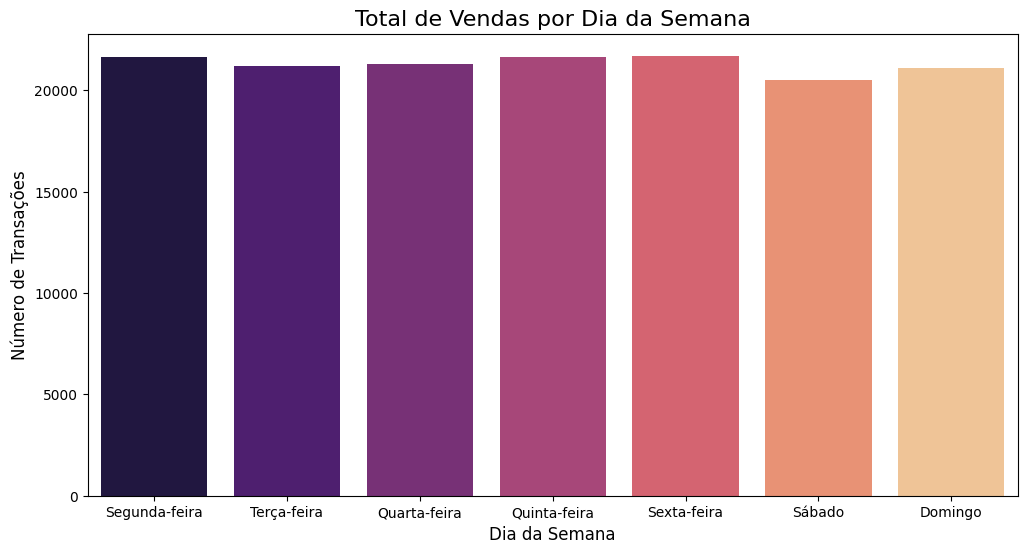

In [ ]:
# Gráfico 3 - Vendas por Dia da Semana

ordem_dias_pt = ["Segunda-feira", "Terça-feira", "Quarta-feira", "Quinta-feira", "Sexta-feira", "Sábado", "Domingo"]
vendas_por_dia = df['dia_da_semana'].value_counts().reindex(ordem_dias_pt)

# Criação do gráfico

plt.figure(figsize=(12, 6))
sns.barplot(x=vendas_por_dia.index, y=vendas_por_dia.values, palette='magma')
plt.title('Total de Vendas por Dia da Semana', fontsize=16)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Número de Transações', fontsize=12)
plt.savefig('vendas_por_dia_pt.png')
plt.show()